# Fonis Datageeks
## Wokshop: Intro to Machine Learning: Classification and Regression
### Domaći zadatak 3: Opisati kod za vizualizaciju modela sa opisom korišćenih funkcija

`import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()`

***

**Dodati code cellove sa rešenjem nakon svakog pitanja.**

***

1. Prava prilika da jednim zadatkom obnoviš znanje sa prve i druge radionice, pritom malo pročitaš dokumentaciju i skapiraš vizualizaciju modela. Do petka napravi notebook sa ovim kodom, opisom svake funkcije koja se poziva i objašnjenjem kako je i šta je kreirano. Pošalji mi to i brzo odgovaram. :D

In [47]:
#importujemo sve potrebne biblioteke
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#isključujemo upozorenja
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

#učitavamo bazu podataka iz Sklearn-a za klasifikaciju
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [15]:
df[['petal length (cm)','petal width (cm)']].describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [16]:
df.pivot_table(['petal length (cm)', 'petal width (cm)'],
              ['target'], aggfunc='mean')

,petal length (cm),petal width (cm)
target,,
0.0,1.462,0.246
1.0,4.260,1.326
2.0,5.552,2.026


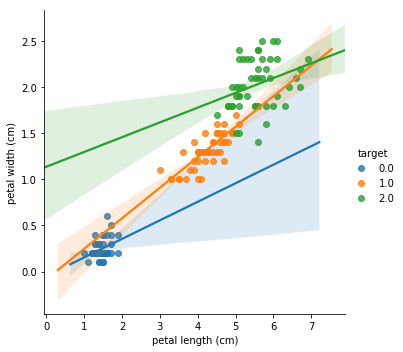

In [8]:
sns.lmplot('petal length (cm)', 'petal width (cm)', data=df, hue='target')

In [20]:
# Pojednako imamo uzoraka od svake vrste
df['target'].value_counts(normalize=True)

2.0    0.333333
1.0    0.333333
0.0    0.333333
Name: target, dtype: float64

In [28]:
# Predviđamo na osnovu dužine i visine latica
X = df.iloc[:, [2, 3]].values 
y = df.iloc[:, 4].values
print(y[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Učitavamo sklearn klasu za podelu na trening i test i biramo veličinu testa na 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
# Učitavamo sklearn klasu za algoritam stablo odlučivanja, podešavamo entropiju kao kriterijum zatim pravimo model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

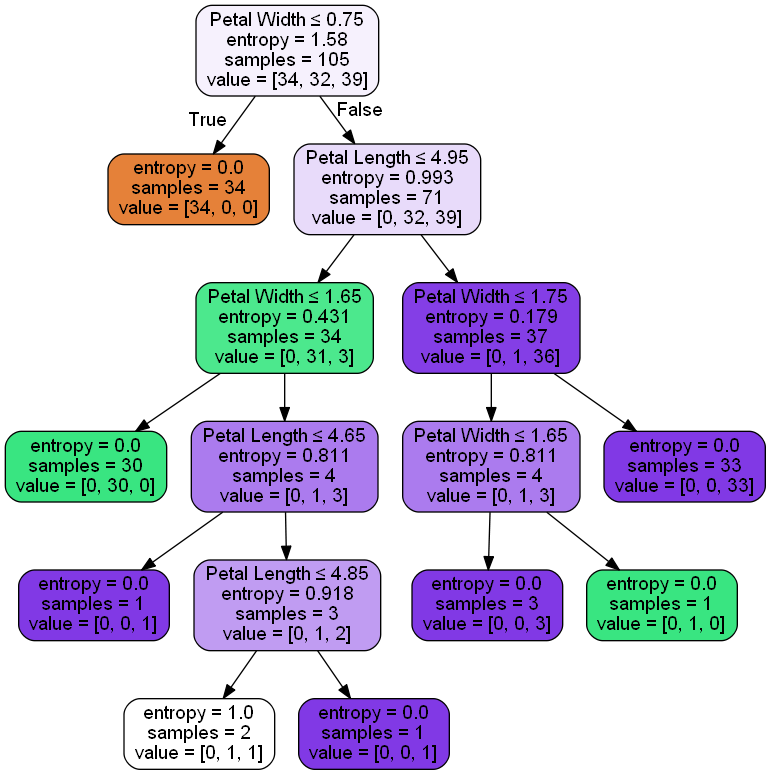

In [26]:
# Učitavamo potrebne klase kako mi mogli da vizualizujemo naš prediktivni model
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Petal Length', 'Petal Width'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
df.iloc[72, :]

sepal length (cm)    6.3
sepal width (cm)     2.5
petal length (cm)    4.9
petal width (cm)     1.5
target               1.0
Name: 72, dtype: float64

In [31]:
# Pravimo predikciju za test podatke
y_pred = classifier.predict(X_test)
y_pred[:10]

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1.])

In [36]:
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 1., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0.])

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2, X3 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5),
                         np.arange(start = X_set[:, 2].min(), stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, X3,  classifier.predict(np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.zlim(X3.min(), X3.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

Ispisati i objasniti funkcije

**np.meshgrid** - <br>
**predict** - <br>
**np.arrange** - <br>
**np.arrange** - <br>
**np.arrange** - <br>
**np.arrange** - <br>
**np.arrange** - <br>
**np.arrange** - <br>


***

Literatura:

1. [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)<br>
2. [Ridge and Lasso Regression:: A Complete Guide with Python Scikit-Learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)<br>
3. [A Complete Tutorial on Ridge and Lasso Regression in Python](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)<br>
4. [What is Regularization in Data Science](https://financetrain.com/regularization-data-science-lasso-ridge-elastic-net/)<br>
5. [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)<br>
6. [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)<br>
7. [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)<br>